## Load Datasets

In [4]:
import pandas as pd
import numpy as np
import os

path = '..\\data'
filenames = [
    'data-cityofnewyork-us.8eq5-dtjb.csv',
    'data-cityofnewyork-us.gt6r-wh7c.csv',
    'data-cityofnewyork-us.m6ad-jy3s.csv',
    'data-cityofnewyork-us.emuv-tx7t.csv',
]
columns = [
    'Salaries',
    'Salaries',
    'Salaries',
    'Salaries',
]
# pandas Series of Salaries columns
salaries = []
for filename, col in zip(filenames, columns):
    df = pd.read_csv(os.path.join(path, filename), usecols=[col])
    salaries.append(df[col])

## Salary

### Column Introduction

This kind of columns are related to "Salary" or "Paid", usually many datesets will have more than one related columns. Depending on the definition of "Salary" or "Paid" for each column, their values may be very different. Because of the variety, defining which value is correct or wrong can be difficult or somewhat ambiguous.In this project, we would mainly focus on the distribution of values.

### Our original strategy

In the original dataset, related columns are "Base Salary", "Regular Gross Paid" and "Total OT Paid". The raw data in these columns is already relatively clean, so data profiling and data cleaning is rather simple. For example, each row in the raw data has a definite value and there are no NaN values; and its data format is either a standard integer or floating point number, there's no other special characters. 

Since the data format of the original dataset doesn't have any problem, the data profiling for the original data set has following two steps:
- first, count the minimum, maximum, mean and median.
- Then, draw the histogram of frequency distribution of each column. These statistics as well as the visualization images can help us to better identify outliers.

Once we got the outliers from the data profiling, we performed the data cleaning strategy by deleting those abnormal rows. Among these, negative values were the most obvious outliers, as it is clearly impossible for a person to have a negative salary.

### Result of effectiveness and problems in new datasets

For other types of data, the above method may find some exceptionally small or large outliers. However, there is one special feature about the data of salaries. That is, salaries vary drastically from person to person, because not only thers's wide gap between the rich and the poor, but also the ways in which they are paid can be so differnt that many of the so-called "salary" values actually make little sense. In fact, even considering negative values as outliers is debatable. Some sources suggest that negative values might be used for correcting previous payroll data in some cases.

Overall, measuring the effectiveness of our data cleaning strategy for salary columns turns out to be tricky, so we decided to spend more efforts on profiling rather than cleaning.

We inspected new datasets "8eq5-dtjb.csv", "emuv-tx7t.csv", "gt6r-wh7c.csv" ,"m6ad-jy3s.csv" and noticed that salary column of dataset "emuv-tx7t.csv" contains invalid string which can not be directly converted to integers. What's more, there're also many NaN values, which are not appeared in original dataset.

### Apply our refined strategy

Before cleaning the invalid string from dataset "emuv-tx7t.csv", we first applied original strategy on other datasets which have the valid format. However, **Figure 1** histogram shows that there's no negative values in these new datasets, and since we didn't remove NaN values, the original strategy didn't actially clean anything.

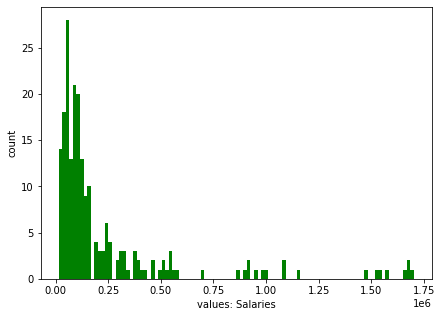

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def histogram(ax, x, name, color, b_size, y_log=True):
    ax.set_xlabel(f'values: {name}')
    if y_log: 
        ax.set_yscale('log', base = 10)
        ax.set_ylabel('count (log)')
    else:
        ax.set_ylabel('count')
    _ = ax.hist(x, bins=b_size, color=color)

fig, ax = plt.subplots(1, 1, figsize=(7,5))
x = pd.concat(salaries[:3])
histogram(ax, x, 'Salaries', 'green', 100, False)
# Figure 1: histogram except "emuv-tx7t.csv"

Here we noticed that some people earn more than 1 million (dollars?). Although these values are surprisingly large, we cannot simply consider them as outliers, because such high salaries are entirely possible.

In dataset "emuv-tx7t.csv", there're strings like " 64,575 " or " -   ", with unnecessary spaces, commas and dash character which represents NaN. So our refined strategy will properly convert them into numbers.
- Remove spaces and commas.
- Replace dash character with NaN.
- As for the NaN values, we decided to keep them since standard IEEE 754 float format supports NaN.

In [6]:
malformed_col = salaries[3]
malformed_col = malformed_col.str.replace(' ', '')
malformed_col = malformed_col.str.replace(',', '')
malformed_col = malformed_col.replace('-', np.nan)
salaries[3] = malformed_col.astype('float')

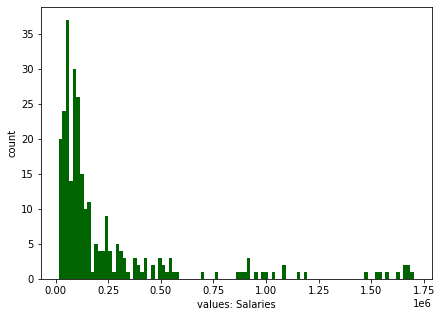

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
x = pd.concat(salaries)
histogram(ax, x, 'Salaries', 'darkgreen', 100, False)
# Figure 2: histogram for all datasets